<a href="https://colab.research.google.com/github/Jokerakos/Python_Projects/blob/master/Data%20Analysis%20-%20Final%20Project%20-%20Spotify%20-%20BillBoard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Τελική Εργασία**

**ΕΔΔΕ2 "Ανάλυση Μεγάλων Δεδομένων μέσω της Γλώσσας Python"**





In [31]:
import requests
from bs4 import BeautifulSoup

In [32]:
def get_year_end_songs(year):
    """Επιστρέφει λίστες με λεξικά που περιλαμβάνει τίτλο, καλλιτέχνη και αριθμό στο top 100 που πήρε την αντίστοιχη χρονιά"""

    url = 'https://en.m.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_'+str(year)
    r = requests.get(url)
    bs = BeautifulSoup(r.text, 'lxml')
    rows = bs.find('table').find_all('tr')
    songs = []
    for row in rows[1:]:
        cols = row.find_all(['td', 'th'])
        cols = [t.text.strip().strip('"') for t in cols]
        song = {}
        try:
            song['number'] = cols[0]
        except:
            song['number'] = None
            
        try:
            song['title'] = cols[1]
        except:
            song['title'] = None
            
        try:
            song['artist'] = cols[2]
        except:
            song['artist'] = None
            
        
        song['year'] = year
        songs.append(song)
    return (songs)

In [33]:
all_songs = []
for year in range(2010, 2020):
    all_songs.extend(get_year_end_songs(year))

In [34]:
import pandas as pd

In [35]:
#Βάζω τα δεδομένα σε ένα dataframe
df = pd.DataFrame(all_songs)

In [36]:
df.head(150)

,number,title,artist,year
0,1,Tik Tok,Kesha,2010
1,2,Need You Now,Lady Antebellum,2010
2,3,"Hey, Soul Sister",Train,2010
3,4,California Gurls,Katy Perry featuring Snoop Dogg,2010
4,5,OMG,Usher featuring will.i.am,2010
...,...,...,...,...
145,46,I Wanna Go,Britney Spears,2011
146,47,I'm on One,"DJ Khaled featuring Drake, Rick Ross and Lil W...",2011
147,48,You Make Me Feel...,Cobra Starship featuring Sabi,2011
148,49,Yeah 3x,Chris Brown,2011


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   number  800 non-null    object
 1   title   800 non-null    object
 2   artist  800 non-null    object
 3   year    800 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 25.1+ KB


# Το αρχείο kaggle.json μπορείτε να το κατεβάσετε από [εδώ](https://drive.google.com/file/d/1WTLQZqQuUZYsiUqNep9b390Zu0z_6PL4/view?usp=sharing)

In [8]:
!pip install -q kaggle
#Εδώ κάνετε import το json κλειδί που επισυνάπτω
from google.colab import files
files.upload()
!mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
#Αλλαγή δικαιωμάτων του αρχείου

%matplotlib inline

Saving kaggle.json to kaggle.json


In [38]:
!kaggle datasets download -d yamaerenay/spotify-dataset-19212020-160k-tracks

 71% 12.0M/16.9M [00:00<00:00, 38.5MB/s]
100% 16.9M/16.9M [00:00<00:00, 42.9MB/s]


In [39]:
!ls

data_by_artist.csv  data.csv	       sample_data
data_by_genres.csv  data_w_genres.csv  spotify-dataset-19212020-160k-tracks.zip
data_by_year.csv    kaggle.json        super_genres.json


In [40]:
!unzip \*.zip  && rm *.zip


Archive:  spotify-dataset-19212020-160k-tracks.zip
replace data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: data.csv                
replace data_by_artist.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: data_by_artist.csv      
replace data_by_genres.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: data_by_genres.csv      
replace data_by_year.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: data_by_year.csv        
replace data_w_genres.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: data_w_genres.csv       
replace super_genres.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: super_genres.json       


In [41]:
#Βάζω το dataset σε ένα dataframe για καθάρισμα και σύγκριση
dfall = pd.read_csv("data.csv")

In [42]:
print(dfall.isnull().sum())

acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64


In [43]:
#Διαγράφω όλες τις καταχωρήσεις από το 1928 μέχρι το 2009 ώστε να βρω τα δεδομένα που ζητάω
indexNames = dfall[ (dfall['release_date'] >= '1928') & (dfall['release_date'] <= '2009') ].index
dfall.drop(indexNames , inplace=True)

In [44]:
dfall

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
6954,0.36900,['Phoenix'],0.626,278080,0.686,0,4HeuTZvLutZJ9Z4gMqDnU4,0.096300,2,0.0958,-7.058,1,Rome,45,2009-05-25,0.0321,126.206,0.3940,2009
6955,0.02870,['Moderat'],0.717,367307,0.460,0,1fmoCZ6mtMiqA5GHWPcZz9,0.785000,11,0.0661,-11.326,0,A New Error,62,2009-05-11,0.0372,110.993,0.0961,2009
6956,0.46300,['Bill Callahan'],0.697,279253,0.298,0,7pVAdbWP9gQZvnOIqBL6Cl,0.782000,2,0.1070,-13.037,1,Jim Cain,56,2009-04-14,0.0286,106.431,0.5610,2009
6957,0.00203,"['Beyoncé', 'Lady Gaga', 'William Burke']",0.320,304693,0.782,0,2nX9948PslVYrrHUf6w0eL,0.000851,8,0.3900,-7.370,1,Video Phone (feat. Lady Gaga),53,2009-11-20,0.3740,78.050,0.5270,2009
6958,0.71900,['Carl Carlton'],0.546,153947,0.828,0,5i7rT8lbGzjj1n7TTXR5U8,0.030000,4,0.3720,-4.771,1,Everlasting Love,48,2009-01-01,0.0394,121.418,0.4010,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,0.17300,"['DripReport', 'Tyga']",0.875,163800,0.443,1,4KppkflX7I3vJQk7urOJaS,0.000032,1,0.0891,-7.461,1,Skechers (feat. Tyga) - Remix,75,2020-05-15,0.1430,100.012,0.3060,2020
169905,0.01670,"['Leon Bridges', 'Terrace Martin']",0.719,167468,0.385,0,1ehhGlTvjtHo2e4xJFB0SZ,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),64,2020-06-08,0.0403,128.000,0.2700,2020
169906,0.53800,"['Kygo', 'Oh Wonder']",0.514,180700,0.539,0,52eycxprLhK3lPcRLbQiVk,0.002330,7,0.1080,-9.332,1,How Would I Know,70,2020-05-29,0.1050,123.700,0.1530,2020
169907,0.07140,"['Cash Cash', 'Andy Grammer']",0.646,167308,0.761,0,3wYOGJYD31sLRmBgCvWxa4,0.000000,1,0.2220,-2.557,1,I Found You,70,2020-02-28,0.0385,129.916,0.4720,2020


In [45]:
#Διαγράφω τις κολώνες που δεν χρειάζομαι
dfall = dfall.drop(columns=['id', 'mode','liveness','explicit','energy','instrumentalness','speechiness'])

In [46]:
#Συγκρίνω το dataframe με όλα τα δεδομένα με το dataframe που έχει αυτά που ψάχνω και βάζω boolean τιμή True σε όσα ταιριάζουν
dfall['match'] = dfall['name'].isin(df['title'])


In [47]:
dfall

,acousticness,artists,danceability,duration_ms,key,loudness,name,popularity,release_date,tempo,valence,year,match
6954,0.36900,['Phoenix'],0.626,278080,2,-7.058,Rome,45,2009-05-25,126.206,0.3940,2009,False
6955,0.02870,['Moderat'],0.717,367307,11,-11.326,A New Error,62,2009-05-11,110.993,0.0961,2009,False
6956,0.46300,['Bill Callahan'],0.697,279253,2,-13.037,Jim Cain,56,2009-04-14,106.431,0.5610,2009,False
6957,0.00203,"['Beyoncé', 'Lady Gaga', 'William Burke']",0.320,304693,8,-7.370,Video Phone (feat. Lady Gaga),53,2009-11-20,78.050,0.5270,2009,False
6958,0.71900,['Carl Carlton'],0.546,153947,4,-4.771,Everlasting Love,48,2009-01-01,121.418,0.4010,2009,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,0.17300,"['DripReport', 'Tyga']",0.875,163800,1,-7.461,Skechers (feat. Tyga) - Remix,75,2020-05-15,100.012,0.3060,2020,False
169905,0.01670,"['Leon Bridges', 'Terrace Martin']",0.719,167468,8,-10.907,Sweeter (feat. Terrace Martin),64,2020-06-08,128.000,0.2700,2020,False
169906,0.53800,"['Kygo', 'Oh Wonder']",0.514,180700,7,-9.332,How Would I Know,70,2020-05-29,123.700,0.1530,2020,False
169907,0.07140,"['Cash Cash', 'Andy Grammer']",0.646,167308,1,-2.557,I Found You,70,2020-02-28,129.916,0.4720,2020,False


In [48]:
#Διαγράφω όλες τις τιμές που έχουν το match False
dfall = dfall.loc[dfall.match, :]
dfall = dfall.drop_duplicates(subset='name', keep="last")

In [49]:
dfall

,acousticness,artists,danceability,duration_ms,key,loudness,name,popularity,release_date,tempo,valence,year,match
7752,0.00381,"['Zay Hilfigerrr', 'Zayion McCall']",0.807,144244,1,-3.892,Juju on That Beat (TZ Anthem),62,2016-09-30,160.517,0.7800,2016,True
15167,0.53400,['Local Natives'],0.588,237933,2,-7.838,Airplanes,46,2010-02-16,95.971,0.5910,2010,True
15407,0.19500,['Josh Abbott Band'],0.464,268160,4,-6.310,Taste,47,2012-09-25,117.862,0.6090,2012,True
15452,0.19500,"['Ross Lynch', 'Spencer Lee', 'Maia Mitchell',...",0.588,220253,9,-4.718,Meant to Be,55,2013-01-01,125.004,0.6310,2013,True
23060,0.15000,"['Mike Posner', 'Big Sean']",0.840,225123,7,-4.277,Cooler Than Me,45,2009-02-28,129.014,0.7900,2009,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
169469,0.53000,['The 1975'],0.792,293067,8,-6.516,Paris,56,2016-02-26,117.012,0.8630,2016,True
169559,0.41800,"['Big Wild', 'Hundred Waters']",0.566,227556,1,-8.303,Show Me,59,2017-10-09,101.171,0.0394,2017,True
169592,0.00430,['Lil Uzi Vert'],0.623,173798,8,-7.076,X,61,2017-08-25,163.159,0.3010,2017,True
169733,0.15600,['YNW Melly'],0.657,260333,10,-7.632,Bang Bang,65,2019-11-22,179.687,0.4420,2019,True


In [50]:
#Διαγράφω την κολώνα match μιας και πλέον έχω τα δεδομένα που χρειάζομαι
dfall = dfall.drop(columns=['match'])

In [51]:
#Καθαρίζω τις αγκύλες από τα ονόματα καλλιτεχνών
dfall['artists'] = dfall['artists'].str[2:]
dfall['artists'] = dfall['artists'].str.slice(0, -2)


In [52]:
dfall

,acousticness,artists,danceability,duration_ms,key,loudness,name,popularity,release_date,tempo,valence,year
7752,0.00381,"Zay Hilfigerrr', 'Zayion McCall",0.807,144244,1,-3.892,Juju on That Beat (TZ Anthem),62,2016-09-30,160.517,0.7800,2016
15167,0.53400,Local Natives,0.588,237933,2,-7.838,Airplanes,46,2010-02-16,95.971,0.5910,2010
15407,0.19500,Josh Abbott Band,0.464,268160,4,-6.310,Taste,47,2012-09-25,117.862,0.6090,2012
15452,0.19500,"Ross Lynch', 'Spencer Lee', 'Maia Mitchell', '...",0.588,220253,9,-4.718,Meant to Be,55,2013-01-01,125.004,0.6310,2013
23060,0.15000,"Mike Posner', 'Big Sean",0.840,225123,7,-4.277,Cooler Than Me,45,2009-02-28,129.014,0.7900,2009
...,...,...,...,...,...,...,...,...,...,...,...,...
169469,0.53000,The 1975,0.792,293067,8,-6.516,Paris,56,2016-02-26,117.012,0.8630,2016
169559,0.41800,"Big Wild', 'Hundred Waters",0.566,227556,1,-8.303,Show Me,59,2017-10-09,101.171,0.0394,2017
169592,0.00430,Lil Uzi Vert,0.623,173798,8,-7.076,X,61,2017-08-25,163.159,0.3010,2017
169733,0.15600,YNW Melly,0.657,260333,10,-7.632,Bang Bang,65,2019-11-22,179.687,0.4420,2019


In [53]:
#Μετονομάζω την κολώνα name σε title γιατί το name παραπέμπει σε εντολή και δεν θα δουλέψουν οι παρακάτω εντολές
dfall.rename(columns={'name':'title'}, inplace=True)

In [54]:
pip install PyLyrics


  Created wheel for PyLyrics: filename=PyLyrics-1.1.0-cp36-none-any.whl size=3578 sha256=a8b282631ac8d77a5cde80f222aedd2b1610a054df6d53cf289297a338ccadf4
  Stored in directory: /root/.cache/pip/wheels/75/41/30/3aaf00a1c51003972eec70fb44fe9384586fab06e241aa706d
Successfully built PyLyrics


In [55]:
#Κάνω Import την βιβλιοθήκη PyLyrics και δοκιμάζω για κάθε στοιχείο του dataframe να κατεβάσω τους στίχους του
from PyLyrics import PyLyrics
from pprint import pprint
from pandas import read_csv

for index, row in dfall.iterrows():
  print('Getting lyrics for', row.artists, row.title)
  try:
    lyrics = PyLyrics.getLyrics(row.artists, row.title)
  except:
    lyrics = None
    print('Failed to get lyrics for', row.artists, row.title)
  dfall.loc[index, 'Lyrics'] = lyrics

pprint(dfall)

Getting lyrics for Zay Hilfigerrr', 'Zayion McCall Juju on That Beat (TZ Anthem)


/usr/local/lib/python3.6/dist-packages/PyLyrics/functions.py:78: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 78 of the file /usr/local/lib/python3.6/dist-packages/PyLyrics/functions.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  s = BeautifulSoup(r.text)


Failed to get lyrics for Zay Hilfigerrr', 'Zayion McCall Juju on That Beat (TZ Anthem)
Getting lyrics for Local Natives Airplanes
Getting lyrics for Josh Abbott Band Taste
Failed to get lyrics for Josh Abbott Band Taste
Getting lyrics for Ross Lynch', 'Spencer Lee', 'Maia Mitchell', 'Grace Phipps', 'Garrett Clayton Meant to Be
Failed to get lyrics for Ross Lynch', 'Spencer Lee', 'Maia Mitchell', 'Grace Phipps', 'Garrett Clayton Meant to Be
Getting lyrics for Mike Posner', 'Big Sean Cooler Than Me
Failed to get lyrics for Mike Posner', 'Big Sean Cooler Than Me
Getting lyrics for Twin Forks Back to You
Getting lyrics for Kolby Cooper It Ain't Me
Failed to get lyrics for Kolby Cooper It Ain't Me
Getting lyrics for Conor Maynard Don't Let Me Down
Getting lyrics for Ari Lennox', 'Dreamville', 'Cozz Backseat
Failed to get lyrics for Ari Lennox', 'Dreamville', 'Cozz Backseat
Getting lyrics for Fall Out Boy I Don't Care
Getting lyrics for Kidz Bop Kids Timber
Getting lyrics for OMI Cheerleader

In [56]:
print(dfall.isnull().sum())

acousticness      0
artists           0
danceability      0
duration_ms       0
key               0
loudness          0
title             0
popularity        0
release_date      0
tempo             0
valence           0
year              0
Lyrics          165
dtype: int64


In [57]:
#Διαγράφω όποιες καταχωρήσεις δεν έχουν στίχους
dfall = dfall.dropna()

In [58]:
#Καθαρίζω τους στίχους από την εντολή new line
dfall = dfall.replace(r'\n',' ', regex=True) 

In [59]:
dfall

,acousticness,artists,danceability,duration_ms,key,loudness,title,popularity,release_date,tempo,valence,year,Lyrics
15167,0.53400,Local Natives,0.588,237933,2,-7.838,Airplanes,46,2010-02-16,95.971,0.5910,2010,The desk where you sit inside of a frame Made ...
23570,0.00447,Twin Forks,0.546,170963,2,-5.590,Back to You,54,2014-02-25,128.973,0.3400,2014,I was young so I forgot Which was my place and...
31832,0.91300,Conor Maynard,0.446,164129,9,-8.447,Don't Let Me Down,65,2016-08-05,108.580,0.2090,2016,"Crashing, hit a wall Right now I need a miracl..."
62157,0.00180,Fall Out Boy,0.532,218880,6,-3.837,I Don't Care,44,2009-01-01,133.976,0.5160,2009,"(Ooh, ooh) Say my name and his in the same br..."
62658,0.02430,Kidz Bop Kids,0.605,190173,8,-2.068,Timber,47,2014-07-15,130.060,0.6620,2014,"It's going down, I'm yellin' ""Timber"" You bett..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
169246,0.87200,A Great Big World,0.447,233267,2,-7.571,Say Something,59,2014-01-20,140.942,0.1420,2014,"Say something, I'm giving up on you I'll be th..."
169281,0.04640,Ella Henderson,0.682,216107,9,-3.777,Ghost,60,2014-06-06,104.987,0.4850,2014,I keep going to the river to pray 'Cause I nee...
169463,0.90200,RY X,0.429,268456,7,-15.725,Only,57,2016-05-06,109.071,0.0913,2016,Coming from the cold Buried under the heat Lay...
169469,0.53000,The 1975,0.792,293067,8,-6.516,Paris,56,2016-02-26,117.012,0.8630,2016,"She said hello, she was letting me know We sha..."


In [60]:
#Κάνω sort ανά το popularity ώστε να βγάλω έναν πίνακα με τα πιο δημοφιλή τραγούδια των τελευταίων 10 ετών με βάση τον δείκτη Popularity του Spoptify API
dfall.sort_values('popularity', ascending = False, inplace = True)
dfall = dfall.reset_index(drop=True)
print(dfall.head(10))

   acousticness  ...                                             Lyrics
0       0.34900  ...  Nick Mira on the mix No, no, no, no No no no, ...
1       0.06220  ...  First things first I'mma say all the words ins...
2       0.32800  ...  Man, what? (Haha) This shit funny I was like O...
3       0.04270  ...  We go together Better than birds of a feather,...
4       0.33100  ...  You probably think that you are better now, be...
5       0.92200  ...  What would I do without your smart mouth Drawi...
6       0.06910  ...  Oh, she's sweet but a psycho A little bit psyc...
7       0.03320  ...  Yeah they wishin' and wishin' and wishin' and ...
8       0.00264  ...  Are you all right? I'm all right, I'm quite al...
9       0.06890  ...  Ooh I fall apart Ooh yeah...  She told me that...

[10 rows x 13 columns]


In [61]:
#Κάνω import την βιβλιλοθήκη Counter και μετράω τις φορές που εμφανίστηκε ο κάθε Καλλιτέχνης στο dataframe 
from collections import Counter 
print(Counter(dfall['artists'].values))

Counter({'Drake': 12, 'Taylor Swift': 8, 'Bruno Mars': 6, 'Maroon 5': 5, 'Jason Derulo': 5, 'Kesha': 5, 'Katy Perry': 5, 'Black Eyed Peas': 5, 'Shawn Mendes': 4, 'One Direction': 4, 'Rihanna': 4, 'Ed Sheeran': 4, 'Miley Cyrus': 4, 'P!nk': 4, 'Lady Gaga': 4, 'Britney Spears': 4, 'Imagine Dragons': 3, 'Post Malone': 3, 'The Weeknd': 3, 'Fall Out Boy': 3, 'Coldplay': 3, '5 Seconds of Summer': 3, 'Playboi Carti': 3, 'Florida Georgia Line': 3, 'Rae Sremmurd': 3, 'Jason Aldean': 3, 'Meghan Trainor': 3, 'OneRepublic': 3, 'Sia': 3, 'Beyoncé': 3, 'Adele': 3, 'Selena Gomez': 3, 'Juice WRLD': 2, 'Lil Uzi Vert': 2, 'Childish Gambino': 2, 'Twenty One Pilots': 2, 'Khalid': 2, 'Dua Lipa': 2, 'Future': 2, 'Justin Bieber': 2, 'Luke Combs': 2, 'Bryson Tiller': 2, 'Ariana Grande': 2, 'Eminem': 2, 'Travis Scott': 2, 'Avicii': 2, 'Halsey': 2, 'X Ambassadors': 2, 'Ella Mai': 2, 'Julia Michaels': 2, 'Charlie Puth': 2, 'Sam Hunt': 2, 'Avril Lavigne': 2, 'Cardi B': 2, 'Wiz Khalifa': 2, 'Kenny Chesney': 2, 'Jak

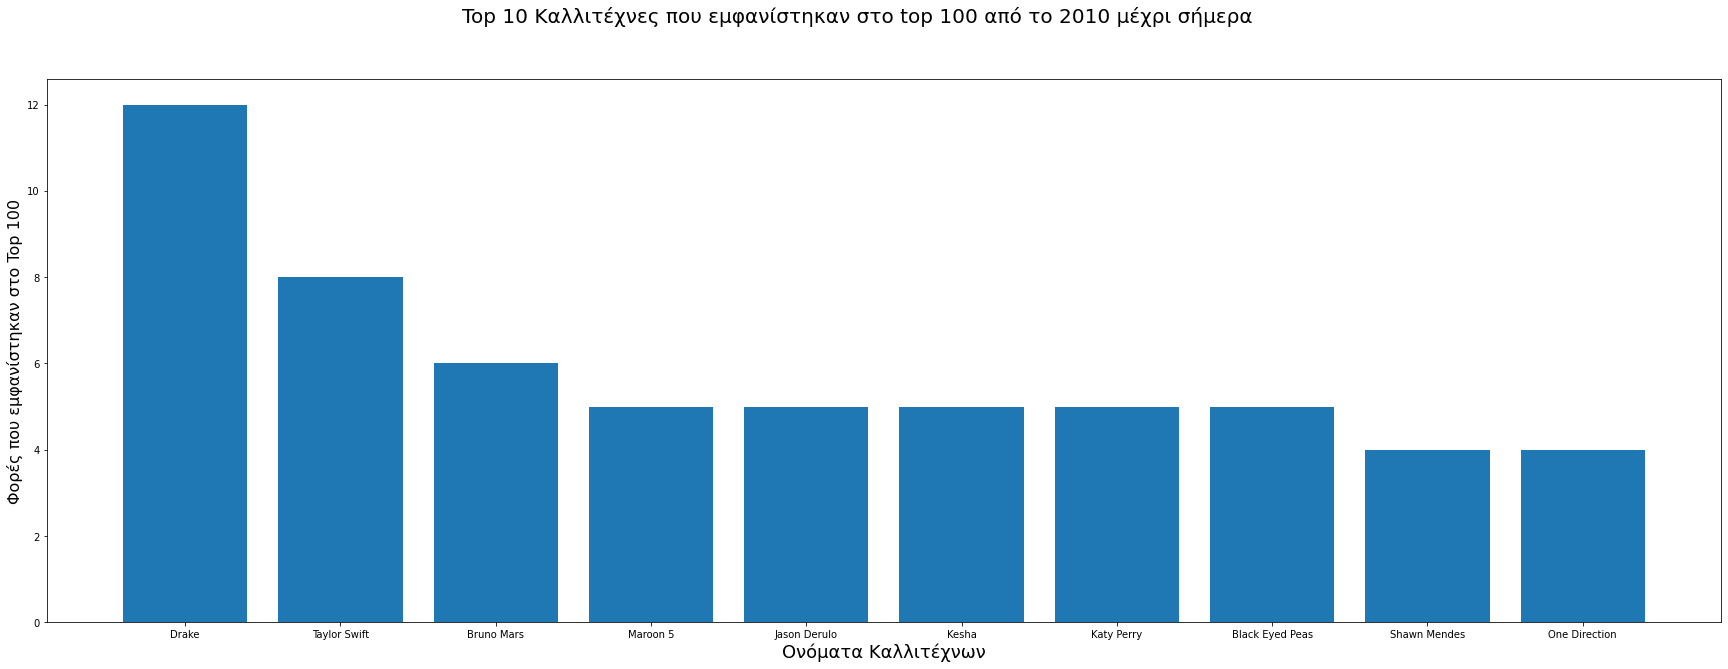

In [62]:
#Κάνω διάγραμμα με τους top 10 καλλιτέχνες
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(30,10),facecolor='w') 
fig.suptitle('Top 10 Καλλιτέχνες που εμφανίστηκαν στο top 100 από το 2010 μέχρι σήμερα', fontsize=20)
plt.xlabel('Ονόματα Καλλιτέχνων', fontsize=18)
plt.ylabel('Φορές που εμφανίστηκαν στο Top 100', fontsize=16)
#ax.imshow(X, cmap=cm.jet)

bar_plot = dict(Counter(dfall['artists'].values).most_common(10))

plt.bar(*zip(*bar_plot.items()))
plt.show()

In [63]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


In [64]:
#Κάνω import την βιβλιοθήκη stopwords και καθαρίζω κάποιες λέξεις που εμφανίστηκαν κατά λάθος
stopwords = set(STOPWORDS)
stopwords.update(["oh", "ooh", "ha", "yeah"])


lyricd = " ".join(lyr for lyr in dfall.Lyrics)

In [65]:
def remov_duplicates(input): 
  
    # split input string separated by space 
    input = input.split(" ") 
  
    # joins two adjacent elements in iterable way 
    for i in range(0, len(input)): 
        input[i] = "".join(input[i]) 
  
    # now create dictionary using counter method 
    # which will have strings as key and their  
    # frequencies as value 
    UniqW = Counter(input) 
  
    # joins two adjacent elements in iterable way 
    s = " ".join(UniqW.keys()) 
    print (s) 
  
# Driver program 
if __name__ == "__main__": 
    input = lyricd
    remov_duplicates(input) 

Nick Mira on the mix No, no, no No (no)  I still see your shadows in my room Can't take back love that gave you It's to point where and hate And cannot change you, so must replace oh Easier said than done thought were one Listenin' heart instead of head You found another But am better won't let forget me left falling landing inside grave know want dead prescriptions make feel a-okay it's all have these lucid dreams can't move a thing Thinking bed everything Thoughts wedding ring Now I'm just off I'll do it over again didn't end watch blow wind should've listened friends Did this shit past last made outta plastic, fake was tangled up drastic ways Who knew evil girls had prettiest face? full mistakes break ache (I room) (can't you) (were fake) ways) but were... ...Instead another... ...Better First things first I'mma say words fired tired way been, oh-ooh The Second second Don't tell what think can be at sail, master sea, broken from young age Taking sulking masses Write down poems for f

In [66]:
#Με regex καθαρίζω τo string που περιλαμβάνει όλους τους στίχους, διαγράφοντας σημεία στίξης, μετατρέποντας όλα τα γράμματα σε lowercase και αφαιρώ όποια λέξη είναι κάτω από 3 γράμματα
import re

lyricd = re.sub(r'[^\w]', ' ', lyricd)
shortword = re.compile(r'\W*\b\w{1,3}\b')
lyricd = shortword.sub('', lyricd)
lyricd = lyricd.lower()

In [67]:
lyricd

'nick mira still your shadows room take back love that gave point where love hate cannot change must replace easier said than done thought were listenin heart instead head found another better forget still your shadows room take back love that gave point where love hate cannot change must replace easier said than done thought were listenin heart instead head found another better forget left falling landing inside grave know that want dead take prescriptions make feel okay know head have these lucid dreams where move thing thinking were everything thoughts wedding ring just better dead over again didn want watch blow wind should listened friends this shit past want last were made outta plastic  fake tangled your drastic ways knew evil girls prettiest face gave heart that full mistakes gave heart made heart break made heart break made heart ache still your shadows room made heart break made heart ache take back love that gave made heart break  were made outta plastic  fake made heart ach

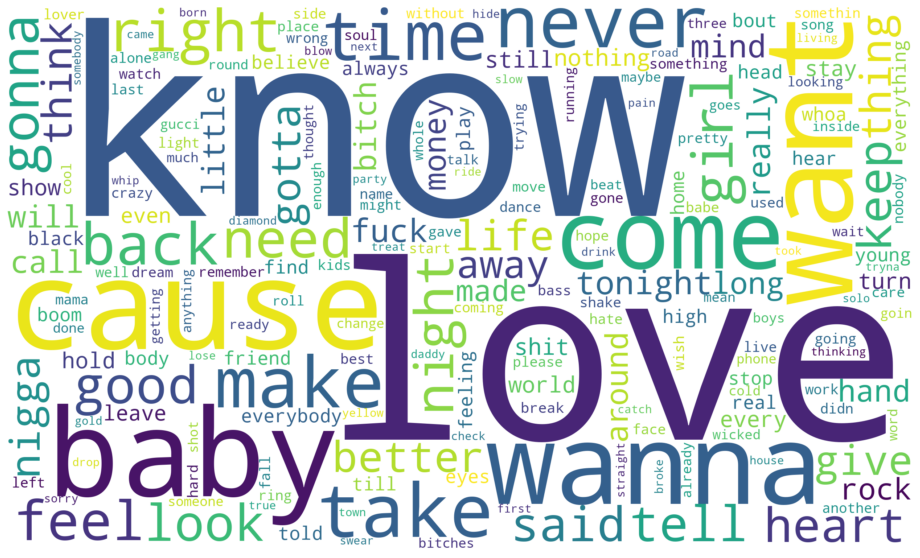

In [68]:
# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=2500, height=1500, collocations = False).generate(lyricd)
fig = plt.figure(figsize=(30,10),facecolor='w') 

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')

plt.axis("off")
plt.show()


In [70]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

All frequencies, without STOPWORDS:
       Frequency
Word            
like        1144
know         970
yeah         941
love         872
cause        641
baby         596
want         537
never        447
come         437
take         433
make         403
back         387
right        387
time         358
need         338
girl         323
good         314
night        312
look         286
could        285


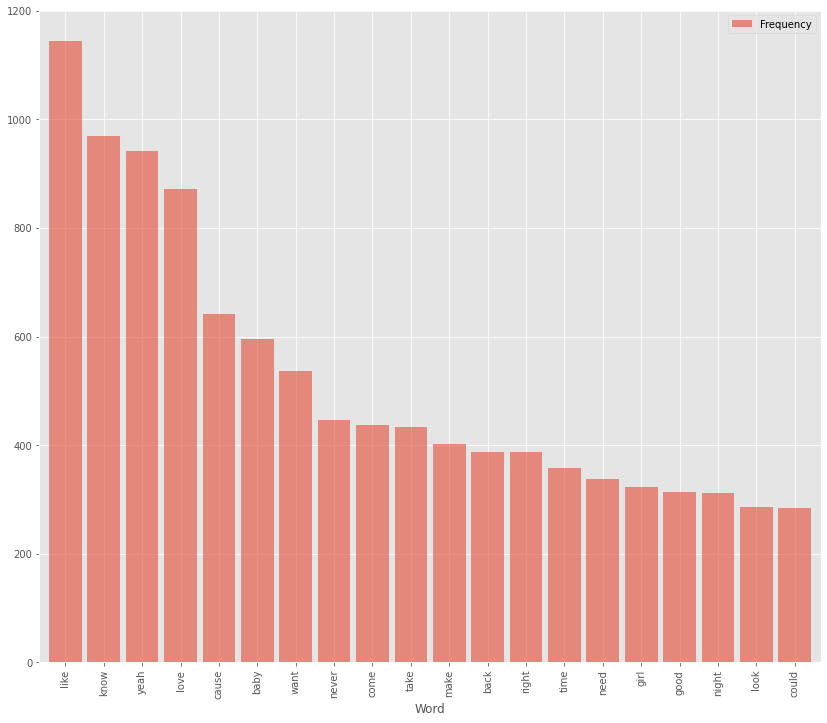

In [71]:
#Κάνω import την βιβλιοθήκη nltk και δημιουργώ διάγραμμα με την συχνότητα που εμφανίζονται λέξεις στους στίχους
from nltk.corpus import stopwords

top_N = 20

words = nltk.tokenize.word_tokenize(lyricd)
words = [w for w in words if len(w) > 3]  # ignore a, an, be, ...
word_dist = nltk.FreqDist(words)

stopwords = nltk.corpus.stopwords.words('english')
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 


print('All frequencies, without STOPWORDS:')
print('=' * 60)
rslt = pd.DataFrame(words_except_stop_dist.most_common(top_N), columns=['Word', 'Frequency']).set_index('Word')
print(rslt)
print('=' * 60)

plt.style.use('ggplot')

rslt.plot.bar(width=0.85, alpha=0.6, figsize=(14,12))

In [72]:
#Εδώ δημιουργώ δύο backup dataframe με τα index Και το release date γιατί αργότερα μου δημιούργησε πρόβλημα η συχνή εναλλαγή τους.
backupd = dfall[['release_date']].copy()

backupd = pd.to_datetime(backupd['release_date'], format='%Y-%m-%d')

backupd

#Αυτό για το resample
rsbacka = dfall[['release_date']].copy()

rsbacka['popularity'] = dfall['popularity']
rsbacka['danceability'] = dfall['danceability']
rsbacka['tempo'] = dfall['tempo']
rsbacka['loudness'] = dfall['loudness']

rsbacka['release_date'] = pd.to_datetime(rsbacka['release_date'], format='%Y-%m-%d' )
rsbacka = rsbacka.set_index('release_date')

rsbacka

,popularity,danceability,tempo,loudness
release_date,,,,
2018-12-10,89,0.511,83.903,-7.230
2017-06-23,87,0.776,124.949,-4.374
2019-03-08,86,0.685,159.966,-5.122
2019-06-07,85,0.842,137.958,-5.065
2018-04-27,85,0.680,145.038,-5.804
...,...,...,...,...
2010-02-16,46,0.588,95.971,-7.838
2009-01-01,44,0.532,133.976,-3.837
2020-06-04,27,0.753,91.972,-7.621


CPU times: user 207 ms, sys: 3.94 ms, total: 211 ms
Wall time: 212 ms


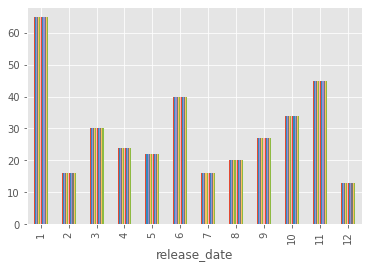

In [73]:
%%time
dfall['release_date'] = pd.to_datetime(dfall['release_date'], format='%Y-%m-%d')


dfall.groupby(dfall["release_date"].dt.month).count().plot(kind="bar", legend = False)


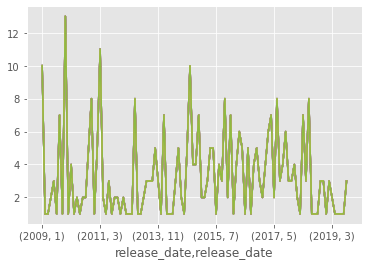

In [74]:
dfall.groupby([dfall['release_date'].dt.year, dfall['release_date'].dt.month]).count().plot(kind="line", legend = False)

In [75]:
dfall.dtypes

acousticness           float64
artists                 object
danceability           float64
duration_ms              int64
key                      int64
loudness               float64
title                   object
popularity               int64
release_date    datetime64[ns]
tempo                  float64
valence                float64
year                     int64
Lyrics                  object
dtype: object

In [76]:
dfall

,acousticness,artists,danceability,duration_ms,key,loudness,title,popularity,release_date,tempo,valence,year,Lyrics
0,0.349000,Juice WRLD,0.511,239836,6,-7.230,Lucid Dreams,89,2018-12-10,83.903,0.218,2018,"Nick Mira on the mix No, no, no, no No no no, ..."
1,0.062200,Imagine Dragons,0.776,204347,10,-4.374,Believer,87,2017-06-23,124.949,0.666,2017,First things first I'mma say all the words ins...
2,0.328000,Juice WRLD,0.685,240051,2,-5.122,Robbery,86,2019-03-08,159.966,0.578,2019,"Man, what? (Haha) This shit funny I was like O..."
3,0.042700,Jonas Brothers,0.842,181027,1,-5.065,Sucker,85,2019-06-07,137.958,0.952,2019,"We go together Better than birds of a feather,..."
4,0.331000,Post Malone,0.680,231267,10,-5.804,Better Now,85,2018-04-27,145.038,0.341,2018,"You probably think that you are better now, be..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,0.534000,Local Natives,0.588,237933,2,-7.838,Airplanes,46,2010-02-16,95.971,0.591,2010,The desk where you sit inside of a frame Made ...
348,0.001800,Fall Out Boy,0.532,218880,6,-3.837,I Don't Care,44,2009-01-01,133.976,0.516,2009,"(Ooh, ooh) Say my name and his in the same br..."
349,0.534000,Lauv,0.753,197437,9,-7.621,I Like Me Better,27,2020-06-04,91.972,0.419,2020,To be young and in love in New York City To no...
350,0.017700,OneRepublic,0.582,259587,9,-5.998,Counting Stars,1,2020-06-12,128.022,0.428,2020,"Lately, I've been, I've been losing sleep Drea..."


In [77]:
rsbacka['popularity'].resample('A').mean()

release_date
2009-12-31    60.807692
2010-12-31    63.400000
2011-12-31    65.074074
2012-12-31    55.833333
2013-12-31    65.866667
2014-12-31    64.886364
2015-12-31    69.809524
2016-12-31    70.214286
2017-12-31    74.187500
2018-12-31    76.228571
2019-12-31    76.142857
2020-12-31    33.600000
Freq: A-DEC, Name: popularity, dtype: float64

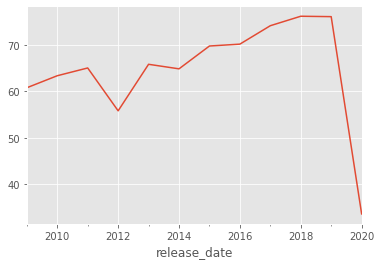

In [78]:
rsbacka['popularity'].resample('A').mean().plot() 


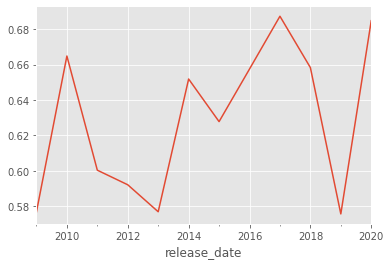

In [79]:
rsbacka['danceability'].resample('A').mean().plot() 

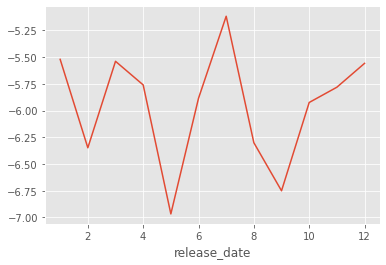

In [80]:
dfall['loudness'].groupby(by=dfall['release_date'].dt.month).mean().plot() 
#spring break και καλοκαίρι

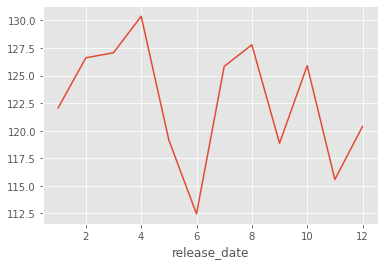

In [81]:
dfall['tempo'].groupby(by=dfall['release_date'].dt.month).mean().plot() 


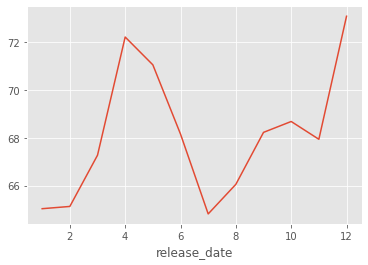

In [82]:
dfall['popularity'].groupby(by=dfall['release_date'].dt.month).mean().plot() 


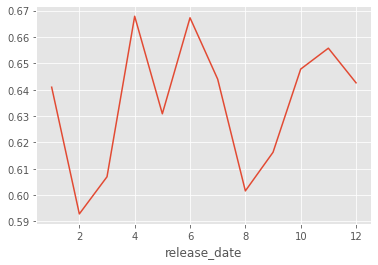

In [83]:
dfall['danceability'].groupby(by=dfall['release_date'].dt.month).mean().plot() 


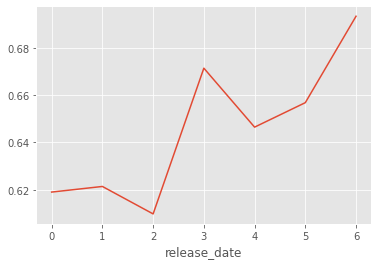

In [84]:
dfall['danceability'].groupby(by=dfall['release_date'].dt.dayofweek).mean().plot() 


In [86]:
import string
def clean_text(Lyrics):
    clean1 = re.sub(r'['+string.punctuation + '’—”'+']', "", Lyrics.lower())
    return re.sub(r'\W+', ' ', clean1)

In [87]:
dfall['tokenized'] = dfall['Lyrics'].map(lambda x: clean_text(x))

In [88]:
dfall.Lyrics = [str (item) for item in dfall['Lyrics']]

In [89]:
dfall['tokenized'] = dfall['Lyrics'].map(lambda x: clean_text(x))

In [90]:
dfall['num_wds'] = dfall['tokenized'].apply(lambda x: len(x.split()))
dfall['num_wds'].mean()

386.7556818181818

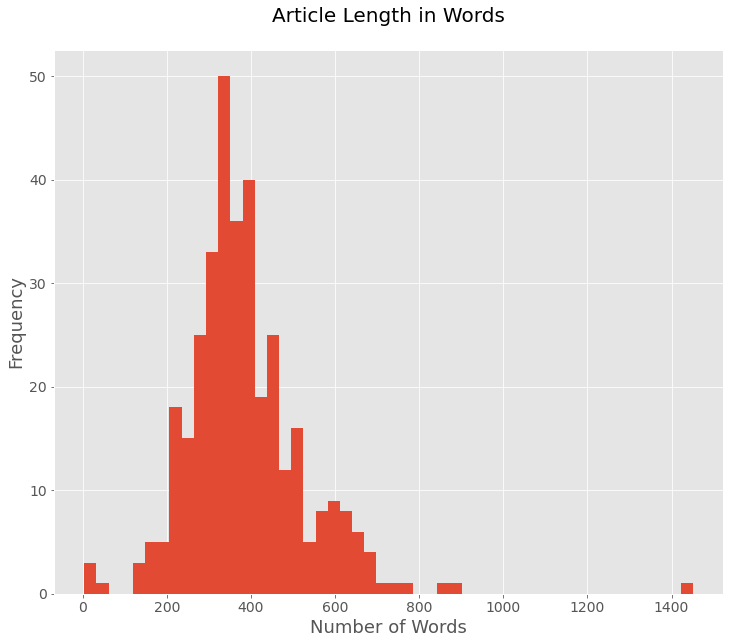

In [91]:
ax=dfall['num_wds'].plot(kind='hist', bins=50, fontsize=14, figsize=(12,10))
ax.set_title('Article Length in Words\n', fontsize=20)
ax.set_ylabel('Frequency', fontsize=18)
ax.set_xlabel('Number of Words', fontsize=18);

In [92]:
dfall['uniq_wds'] = dfall['tokenized'].str.split().apply(lambda x: len(set(x)))
dfall['uniq_wds'].head()

0    122
1    133
2    137
3     83
4    131
Name: uniq_wds, dtype: int64

In [93]:
dfall['uniq_wds'].mean()

116.03693181818181

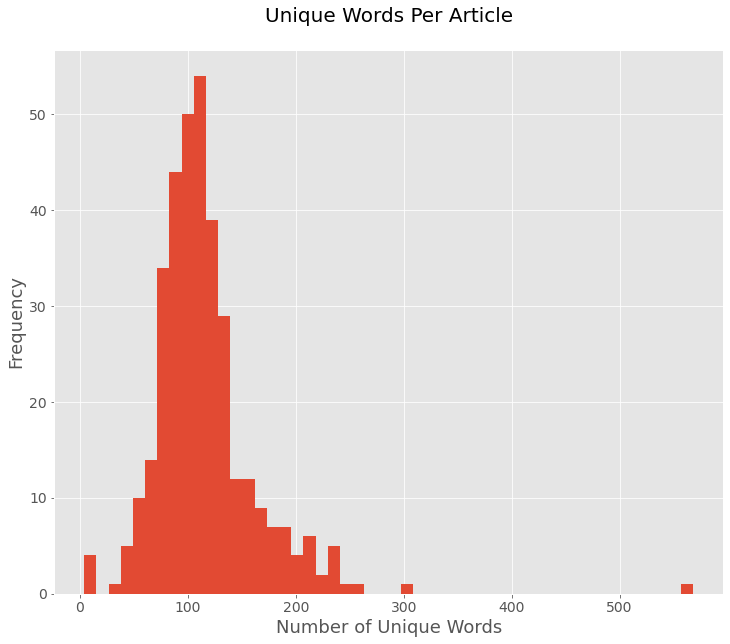

In [94]:
ax=dfall['uniq_wds'].plot(kind='hist', bins=50, fontsize=14, figsize=(12,10))
ax.set_title('Unique Words Per Article\n', fontsize=20)
ax.set_ylabel('Frequency', fontsize=18)
ax.set_xlabel('Number of Unique Words', fontsize=18);

In [95]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
dfall['tokenized'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0      nick mira on the mix no no no no no no no no n...
1      first thing first imma say all the word insid ...
2      man what haha thi shit funni i wa like oof thi...
3      we go togeth better than bird of a feather you...
4      you probabl think that you are better now bett...
                             ...                        
347    the desk where you sit insid of a frame made o...
348    ooh ooh say my name and hi in the same breath ...
349    to be young and in love in new york citi to no...
350    late ive been ive been lose sleep dream about ...
351    i gotta feel that tonight gonna be a good nigh...
Name: tokenized, Length: 352, dtype: object

In [96]:
from textblob import Word
nltk.download('wordnet')
dfall['lemmatized'] = dfall['tokenized'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
dfall['lemmatized'].head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


0    nick mira on the mix no no no no no no no no n...
1    first thing first imma say all the word inside...
2    man what haha this shit funny i wa like oof th...
3    we go together better than bird of a feather y...
4    you probably think that you are better now bet...
Name: lemmatized, dtype: object

In [97]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [99]:
dfall

,acousticness,artists,danceability,duration_ms,key,loudness,title,popularity,release_date,tempo,valence,year,Lyrics,tokenized,num_wds,uniq_wds,lemmatized
0,0.349000,Juice WRLD,0.511,239836,6,-7.230,Lucid Dreams,89,2018-12-10,83.903,0.218,2018,"Nick Mira on the mix No, no, no, no No no no, ...",nick mira on the mix no no no no no no no no n...,594,122,nick mira on the mix no no no no no no no no n...
1,0.062200,Imagine Dragons,0.776,204347,10,-4.374,Believer,87,2017-06-23,124.949,0.666,2017,First things first I'mma say all the words ins...,first things first imma say all the words insi...,407,133,first thing first imma say all the word inside...
2,0.328000,Juice WRLD,0.685,240051,2,-5.122,Robbery,86,2019-03-08,159.966,0.578,2019,"Man, what? (Haha) This shit funny I was like O...",man what haha this shit funny i was like oof t...,437,137,man what haha this shit funny i wa like oof th...
3,0.042700,Jonas Brothers,0.842,181027,1,-5.065,Sucker,85,2019-06-07,137.958,0.952,2019,"We go together Better than birds of a feather,...",we go together better than birds of a feather ...,383,83,we go together better than bird of a feather y...
4,0.331000,Post Malone,0.680,231267,10,-5.804,Better Now,85,2018-04-27,145.038,0.341,2018,"You probably think that you are better now, be...",you probably think that you are better now bet...,498,131,you probably think that you are better now bet...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,0.534000,Local Natives,0.588,237933,2,-7.838,Airplanes,46,2010-02-16,95.971,0.591,2010,The desk where you sit inside of a frame Made ...,the desk where you sit inside of a frame made ...,180,69,the desk where you sit inside of a frame made ...
348,0.001800,Fall Out Boy,0.532,218880,6,-3.837,I Don't Care,44,2009-01-01,133.976,0.516,2009,"(Ooh, ooh) Say my name and his in the same br...",ooh ooh say my name and his in the same breath...,321,94,ooh ooh say my name and his in the same breath...
349,0.534000,Lauv,0.753,197437,9,-7.621,I Like Me Better,27,2020-06-04,91.972,0.419,2020,To be young and in love in New York City To no...,to be young and in love in new york city to no...,283,89,to be young and in love in new york city to no...
350,0.017700,OneRepublic,0.582,259587,9,-5.998,Counting Stars,1,2020-06-12,128.022,0.428,2020,"Lately, I've been, I've been losing sleep Drea...",lately ive been ive been losing sleep dreaming...,517,98,lately ive been ive been losing sleep dreaming...


In [100]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

for i in range(dfall.shape[0]): 
    dfall.loc[i, "polarity"] = abs(sid.polarity_scores(dfall.loc[i, 'lemmatized'])['compound'])
    dfall.loc[i, "negativity"] = abs(sid.polarity_scores(dfall.loc[i, 'lemmatized'])['neg'])
    dfall.loc[i, "neutrality"] = abs(sid.polarity_scores(dfall.loc[i, 'lemmatized'])['neu'])
    dfall.loc[i, "positivity"] = abs(sid.polarity_scores(dfall.loc[i, 'lemmatized'])['pos'])

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [101]:
for i in range(dfall.shape[0]): 
    dfall.loc[i, "title_polarity"] = abs(sid.polarity_scores(dfall.loc[i, "title"])['compound'])

In [102]:
dfall

,acousticness,artists,danceability,duration_ms,key,loudness,title,popularity,release_date,tempo,valence,year,Lyrics,tokenized,num_wds,uniq_wds,lemmatized,polarity,negativity,neutrality,positivity,title_polarity
0,0.349000,Juice WRLD,0.511,239836,6,-7.230,Lucid Dreams,89,2018-12-10,83.903,0.218,2018,"Nick Mira on the mix No, no, no, no No no no, ...",nick mira on the mix no no no no no no no no n...,594,122,nick mira on the mix no no no no no no no no n...,0.8978,0.170,0.655,0.175,0.4019
1,0.062200,Imagine Dragons,0.776,204347,10,-4.374,Believer,87,2017-06-23,124.949,0.666,2017,First things first I'mma say all the words ins...,first things first imma say all the words insi...,407,133,first thing first imma say all the word inside...,0.9889,0.175,0.730,0.094,0.0000
2,0.328000,Juice WRLD,0.685,240051,2,-5.122,Robbery,86,2019-03-08,159.966,0.578,2019,"Man, what? (Haha) This shit funny I was like O...",man what haha this shit funny i was like oof t...,437,137,man what haha this shit funny i wa like oof th...,0.9835,0.205,0.652,0.143,0.0000
3,0.042700,Jonas Brothers,0.842,181027,1,-5.065,Sucker,85,2019-06-07,137.958,0.952,2019,"We go together Better than birds of a feather,...",we go together better than birds of a feather ...,383,83,we go together better than bird of a feather y...,0.9892,0.167,0.736,0.097,0.5267
4,0.331000,Post Malone,0.680,231267,10,-5.804,Better Now,85,2018-04-27,145.038,0.341,2018,"You probably think that you are better now, be...",you probably think that you are better now bet...,498,131,you probably think that you are better now bet...,0.9953,0.053,0.796,0.152,0.4404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,0.534000,Local Natives,0.588,237933,2,-7.838,Airplanes,46,2010-02-16,95.971,0.591,2010,The desk where you sit inside of a frame Made ...,the desk where you sit inside of a frame made ...,180,69,the desk where you sit inside of a frame made ...,0.9865,0.017,0.779,0.205,0.0000
348,0.001800,Fall Out Boy,0.532,218880,6,-3.837,I Don't Care,44,2009-01-01,133.976,0.516,2009,"(Ooh, ooh) Say my name and his in the same br...",ooh ooh say my name and his in the same breath...,321,94,ooh ooh say my name and his in the same breath...,0.9875,0.261,0.572,0.167,0.3875
349,0.534000,Lauv,0.753,197437,9,-7.621,I Like Me Better,27,2020-06-04,91.972,0.419,2020,To be young and in love in New York City To no...,to be young and in love in new york city to no...,283,89,to be young and in love in new york city to no...,0.9989,0.048,0.589,0.363,0.6597
350,0.017700,OneRepublic,0.582,259587,9,-5.998,Counting Stars,1,2020-06-12,128.022,0.428,2020,"Lately, I've been, I've been losing sleep Drea...",lately ive been ive been losing sleep dreaming...,517,98,lately ive been ive been losing sleep dreaming...,0.9817,0.148,0.756,0.096,0.0000


In [103]:

filepath = "https://raw.githubusercontent.com/sebastianruder/emotion_proposition_store/master/NRC-Emotion-Lexicon-v0.92/NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt"
emolex_df = pd.read_csv(filepath,  names=["word", "emotion", "association"], skiprows=45, sep='\t')
emolex_df = emolex_df.pivot(index='word', columns='emotion', values='association').reset_index()
emolex_df.head(20)

emotion,word,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,abacus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0
2,abandon,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,abandoned,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,abandonment,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
5,abate,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,abatement,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,abba,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,abbot,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,abbreviate,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [104]:
from sklearn.feature_extraction.text import TfidfVectorizer
#CountVectorizer(stop_words='english', binary=True)
# I only want you to look for words in the emotional lexicon
# because we don't know what's up with the other words
vec = TfidfVectorizer(vocabulary=emolex_df.word,
                      use_idf=False, 
                      norm= None ) #'l1') # ELL - ONE
matrix = vec.fit_transform(dfall['lemmatized'])
vocab = vec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

,NaN,abacus,abandon,abandoned,abandonment,abate,abatement,abba,abbot,abbreviate,abbreviation,abdomen,abdominal,abduction,aberrant,aberration,abeyance,abhor,abhorrent,abide,ability,abject,ablation,ablaze,abnormal,aboard,abode,abolish,abolition,abominable,abomination,aboriginal,abort,abortion,abortive,abound,abovementioned,abrasion,abroad,abrogate,...,yearly,yearn,yearning,years,yeast,yell,yellow,yellows,yelp,yeoman,yesterday,yesteryear,yew,yield,yielding,yogi,yoke,yolk,yon,yonder,young,younger,youth,zany,zap,zeal,zealot,zealous,zebra,zenith,zephyr,zeppelin,zest,zip,zodiac,zone,zoo,zoological,zoology,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [105]:
# Get your list of positive words

angry_words = emolex_df[emolex_df.anger == 1]['word']

positive_words = emolex_df[emolex_df.positive == 1]['word']

# Get your list of sadness words
sadness_words = emolex_df[emolex_df.sadness == 1]['word']

# Get your list of surprise words
surprise_words = emolex_df[emolex_df.surprise == 1]['word']

# Get your list of disgust words
disgust_words = emolex_df[emolex_df.disgust == 1]['word']

# Get your list of anticipation words
anticipation_words = emolex_df[emolex_df.anticipation == 1]['word']

# Get your list of negative words
negative_words = emolex_df[emolex_df.negative == 1]['word']

# Get your list of joy words
joy_words = emolex_df[emolex_df.joy == 1]['word']

# Get your list of trust words
trust_words = emolex_df[emolex_df.trust == 1]['word']

# Get your list of fear words
fear_words = emolex_df[emolex_df.fear == 1]['word']


In [106]:
dfall['anger'] = (wordcount_df[angry_words].sum(axis=1) / dfall['uniq_wds']) *100

dfall['joy'] = (wordcount_df[joy_words].sum(axis=1) / dfall['uniq_wds']) *100

dfall['disgust'] = (wordcount_df[disgust_words].sum(axis=1) / dfall['uniq_wds']) *100

dfall['surprise'] = (wordcount_df[surprise_words].sum(axis=1) / dfall['uniq_wds']) *100

dfall['trust'] = (wordcount_df[trust_words].sum(axis=1) / dfall['uniq_wds']) *100

dfall['anticipation'] = (wordcount_df[anticipation_words].sum(axis=1) / dfall['uniq_wds']) *10

dfall['sadness'] = (wordcount_df[sadness_words].sum(axis=1) / dfall['uniq_wds']) *100

dfall['fear'] = (wordcount_df[fear_words].sum(axis=1) / dfall['uniq_wds']) *100

In [107]:
dfall

,acousticness,artists,danceability,duration_ms,key,loudness,title,popularity,release_date,tempo,valence,year,Lyrics,tokenized,num_wds,uniq_wds,lemmatized,polarity,negativity,neutrality,positivity,title_polarity,anger,joy,disgust,surprise,trust,anticipation,sadness,fear
0,0.349000,Juice WRLD,0.511,239836,6,-7.230,Lucid Dreams,89,2018-12-10,83.903,0.218,2018,"Nick Mira on the mix No, no, no, no No no no, ...",nick mira on the mix no no no no no no no no n...,594,122,nick mira on the mix no no no no no no no no n...,0.8978,0.170,0.655,0.175,0.4019,8.196721,12.295082,8.196721,4.098361,4.918033,0.983607,11.475410,11.475410
1,0.062200,Imagine Dragons,0.776,204347,10,-4.374,Believer,87,2017-06-23,124.949,0.666,2017,First things first I'mma say all the words ins...,first things first imma say all the words insi...,407,133,first thing first imma say all the word inside...,0.9889,0.175,0.730,0.094,0.0000,4.511278,8.270677,2.255639,4.511278,20.300752,0.601504,18.045113,18.045113
2,0.328000,Juice WRLD,0.685,240051,2,-5.122,Robbery,86,2019-03-08,159.966,0.578,2019,"Man, what? (Haha) This shit funny I was like O...",man what haha this shit funny i was like oof t...,437,137,man what haha this shit funny i wa like oof th...,0.9835,0.205,0.652,0.143,0.0000,13.868613,10.218978,8.029197,5.839416,2.919708,0.583942,20.437956,19.708029
3,0.042700,Jonas Brothers,0.842,181027,1,-5.065,Sucker,85,2019-06-07,137.958,0.952,2019,"We go together Better than birds of a feather,...",we go together better than birds of a feather ...,383,83,we go together better than bird of a feather y...,0.9892,0.167,0.736,0.097,0.5267,22.891566,8.433735,4.819277,4.819277,19.277108,0.481928,15.662651,13.253012
4,0.331000,Post Malone,0.680,231267,10,-5.804,Better Now,85,2018-04-27,145.038,0.341,2018,"You probably think that you are better now, be...",you probably think that you are better now bet...,498,131,you probably think that you are better now bet...,0.9953,0.053,0.796,0.152,0.4404,2.290076,3.053435,1.526718,0.000000,4.580153,0.076336,1.526718,1.526718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,0.534000,Local Natives,0.588,237933,2,-7.838,Airplanes,46,2010-02-16,95.971,0.591,2010,The desk where you sit inside of a frame Made ...,the desk where you sit inside of a frame made ...,180,69,the desk where you sit inside of a frame made ...,0.9865,0.017,0.779,0.205,0.0000,0.000000,8.695652,0.000000,2.898551,8.695652,0.579710,1.449275,0.000000
348,0.001800,Fall Out Boy,0.532,218880,6,-3.837,I Don't Care,44,2009-01-01,133.976,0.516,2009,"(Ooh, ooh) Say my name and his in the same br...",ooh ooh say my name and his in the same breath...,321,94,ooh ooh say my name and his in the same breath...,0.9875,0.261,0.572,0.167,0.3875,7.446809,11.702128,7.446809,4.255319,4.255319,1.914894,7.446809,9.574468
349,0.534000,Lauv,0.753,197437,9,-7.621,I Like Me Better,27,2020-06-04,91.972,0.419,2020,To be young and in love in New York City To no...,to be young and in love in new york city to no...,283,89,to be young and in love in new york city to no...,0.9989,0.048,0.589,0.363,0.6597,3.370787,5.617978,3.370787,3.370787,3.370787,1.460674,1.123596,1.123596
350,0.017700,OneRepublic,0.582,259587,9,-5.998,Counting Stars,1,2020-06-12,128.022,0.428,2020,"Lately, I've been, I've been losing sleep Drea...",lately ive been ive been losing sleep dreaming...,517,98,lately ive been ive been losing sleep dreaming...,0.9817,0.148,0.756,0.096,0.0000,22.448980,30.612245,6.122449,12.244898,29.591837,4.081633,15.306122,11.224490


In [108]:
dfall['release_date'] = pd.to_datetime(dfall['release_date'] )
dfall = dfall.set_index('release_date')


In [109]:
dfall

,acousticness,artists,danceability,duration_ms,key,loudness,title,popularity,tempo,valence,year,Lyrics,tokenized,num_wds,uniq_wds,lemmatized,polarity,negativity,neutrality,positivity,title_polarity,anger,joy,disgust,surprise,trust,anticipation,sadness,fear
release_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-12-10,0.349000,Juice WRLD,0.511,239836,6,-7.230,Lucid Dreams,89,83.903,0.218,2018,"Nick Mira on the mix No, no, no, no No no no, ...",nick mira on the mix no no no no no no no no n...,594,122,nick mira on the mix no no no no no no no no n...,0.8978,0.170,0.655,0.175,0.4019,8.196721,12.295082,8.196721,4.098361,4.918033,0.983607,11.475410,11.475410
2017-06-23,0.062200,Imagine Dragons,0.776,204347,10,-4.374,Believer,87,124.949,0.666,2017,First things first I'mma say all the words ins...,first things first imma say all the words insi...,407,133,first thing first imma say all the word inside...,0.9889,0.175,0.730,0.094,0.0000,4.511278,8.270677,2.255639,4.511278,20.300752,0.601504,18.045113,18.045113
2019-03-08,0.328000,Juice WRLD,0.685,240051,2,-5.122,Robbery,86,159.966,0.578,2019,"Man, what? (Haha) This shit funny I was like O...",man what haha this shit funny i was like oof t...,437,137,man what haha this shit funny i wa like oof th...,0.9835,0.205,0.652,0.143,0.0000,13.868613,10.218978,8.029197,5.839416,2.919708,0.583942,20.437956,19.708029
2019-06-07,0.042700,Jonas Brothers,0.842,181027,1,-5.065,Sucker,85,137.958,0.952,2019,"We go together Better than birds of a feather,...",we go together better than birds of a feather ...,383,83,we go together better than bird of a feather y...,0.9892,0.167,0.736,0.097,0.5267,22.891566,8.433735,4.819277,4.819277,19.277108,0.481928,15.662651,13.253012
2018-04-27,0.331000,Post Malone,0.680,231267,10,-5.804,Better Now,85,145.038,0.341,2018,"You probably think that you are better now, be...",you probably think that you are better now bet...,498,131,you probably think that you are better now bet...,0.9953,0.053,0.796,0.152,0.4404,2.290076,3.053435,1.526718,0.000000,4.580153,0.076336,1.526718,1.526718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-02-16,0.534000,Local Natives,0.588,237933,2,-7.838,Airplanes,46,95.971,0.591,2010,The desk where you sit inside of a frame Made ...,the desk where you sit inside of a frame made ...,180,69,the desk where you sit inside of a frame made ...,0.9865,0.017,0.779,0.205,0.0000,0.000000,8.695652,0.000000,2.898551,8.695652,0.579710,1.449275,0.000000
2009-01-01,0.001800,Fall Out Boy,0.532,218880,6,-3.837,I Don't Care,44,133.976,0.516,2009,"(Ooh, ooh) Say my name and his in the same br...",ooh ooh say my name and his in the same breath...,321,94,ooh ooh say my name and his in the same breath...,0.9875,0.261,0.572,0.167,0.3875,7.446809,11.702128,7.446809,4.255319,4.255319,1.914894,7.446809,9.574468
2020-06-04,0.534000,Lauv,0.753,197437,9,-7.621,I Like Me Better,27,91.972,0.419,2020,To be young and in love in New York City To no...,to be young and in love in new york city to no...,283,89,to be young and in love in new york city to no...,0.9989,0.048,0.589,0.363,0.6597,3.370787,5.617978,3.370787,3.370787,3.370787,1.460674,1.123596,1.123596


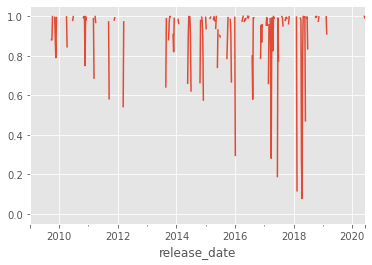

In [110]:
dfall['polarity'].resample('W').mean().plot()

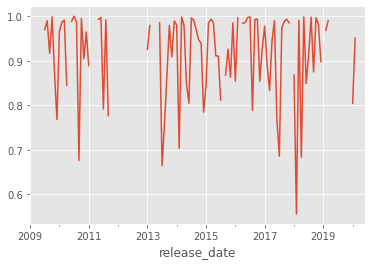

In [111]:
dfall['polarity'].resample('M').mean().plot()


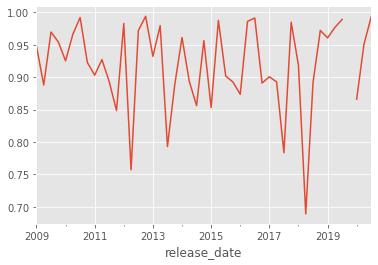

In [112]:
dfall['polarity'].resample('3M').mean().plot()

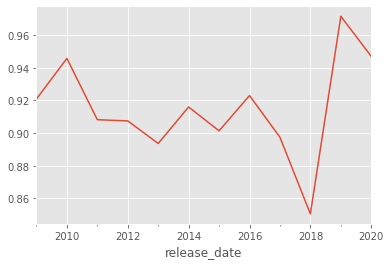

In [113]:
dfall['polarity'].resample('A').mean().plot()

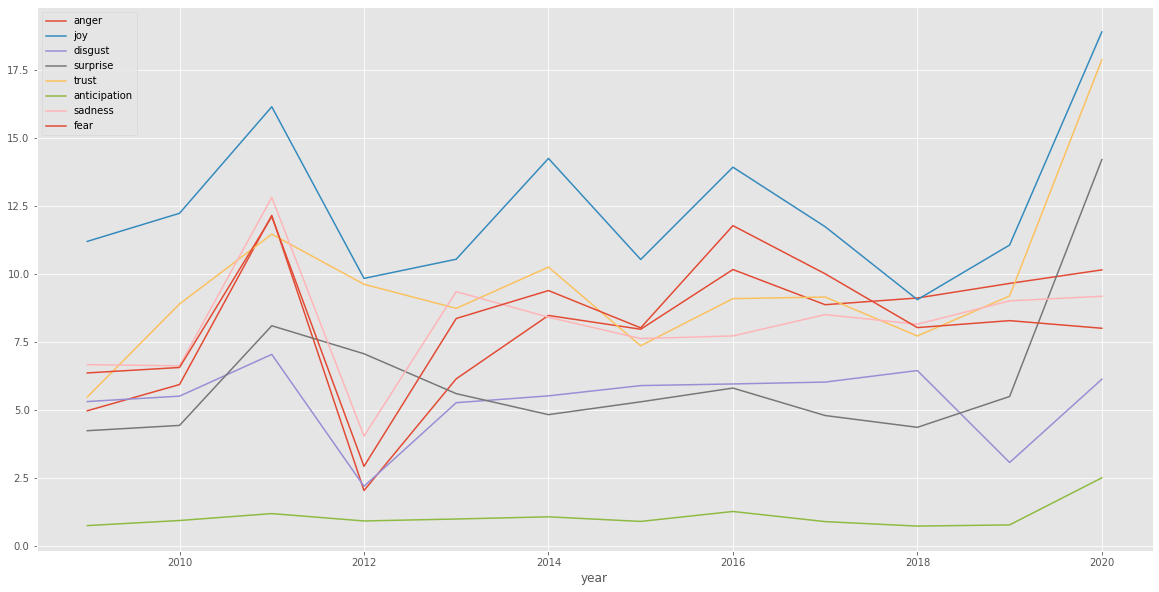

In [128]:
ax = dfall.groupby('year')['anger'].mean().plot(legend = True, figsize=(20, 10))
dfall.groupby('year')['joy'].mean().plot(ax=ax, legend = True)
dfall.groupby('year')['disgust'].mean().plot(ax=ax, legend = True)
dfall.groupby('year')['surprise'].mean().plot(ax=ax, legend = True)
dfall.groupby('year')['trust'].mean().plot(ax=ax, legend = True)
dfall.groupby('year')['anticipation'].mean().plot(ax=ax, legend = True)
dfall.groupby('year')['sadness'].mean().plot(ax=ax, legend = True)
dfall.groupby('year')['fear'].mean().plot(ax=ax, legend = True)



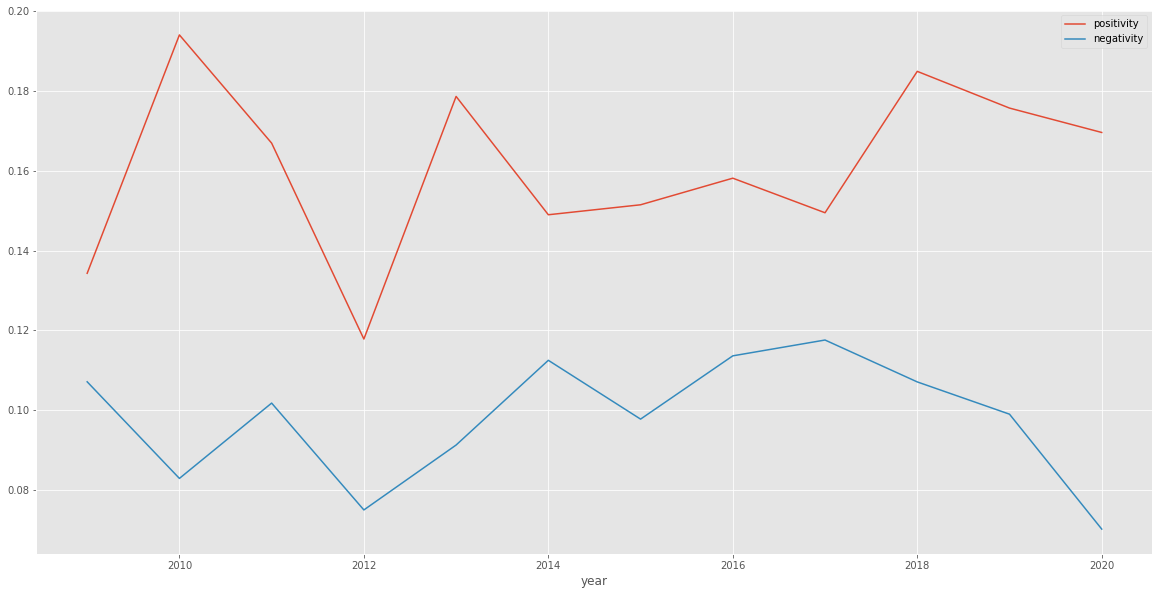

In [132]:
ax = dfall.groupby('year')['positivity'].mean().plot(legend = True, figsize=(20, 10))
dfall.groupby('year')['negativity'].mean().plot(ax=ax, legend = True)


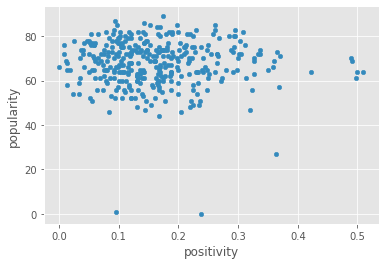

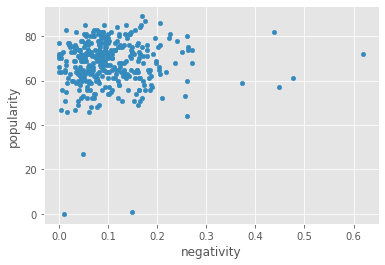

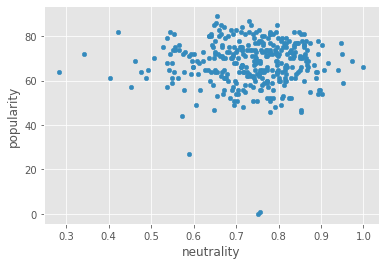

In [136]:
dfall.plot(x='positivity', y='popularity', kind='scatter')
dfall.plot(x='negativity', y='popularity', kind='scatter')
dfall.plot(x='neutrality', y='popularity', kind='scatter')


12. Αξιοποιήστε την διανυσματοποίηση των κειμένων σας (CountVectorizer()), και τη χρήση της
ομοιότητας κειμένων μέσω της συνάρτησης cosine_similarity() ώστε να βρείτε άρθρα που
έχουν μεγάλη ομοιότητα. Παρουσιάστε τη συσχέτιση αυτή μέσω γραφήματος τύπου
heatmap **PENDING**

In [138]:
import spacy

In [139]:
!python -m spacy download en_core_web_sm

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [140]:
nlp = spacy.load('en_core_web_sm')

In [141]:
list(nlp.Defaults.stop_words)[0:20]

['five',
 're',
 'such',
 'their',
 'more',
 'whenever',
 'beside',
 'quite',
 'elsewhere',
 'thereafter',
 'becoming',
 'give',
 'under',
 'various',
 'any',
 'keep',
 'anyway',
 'beyond',
 'much',
 'since']

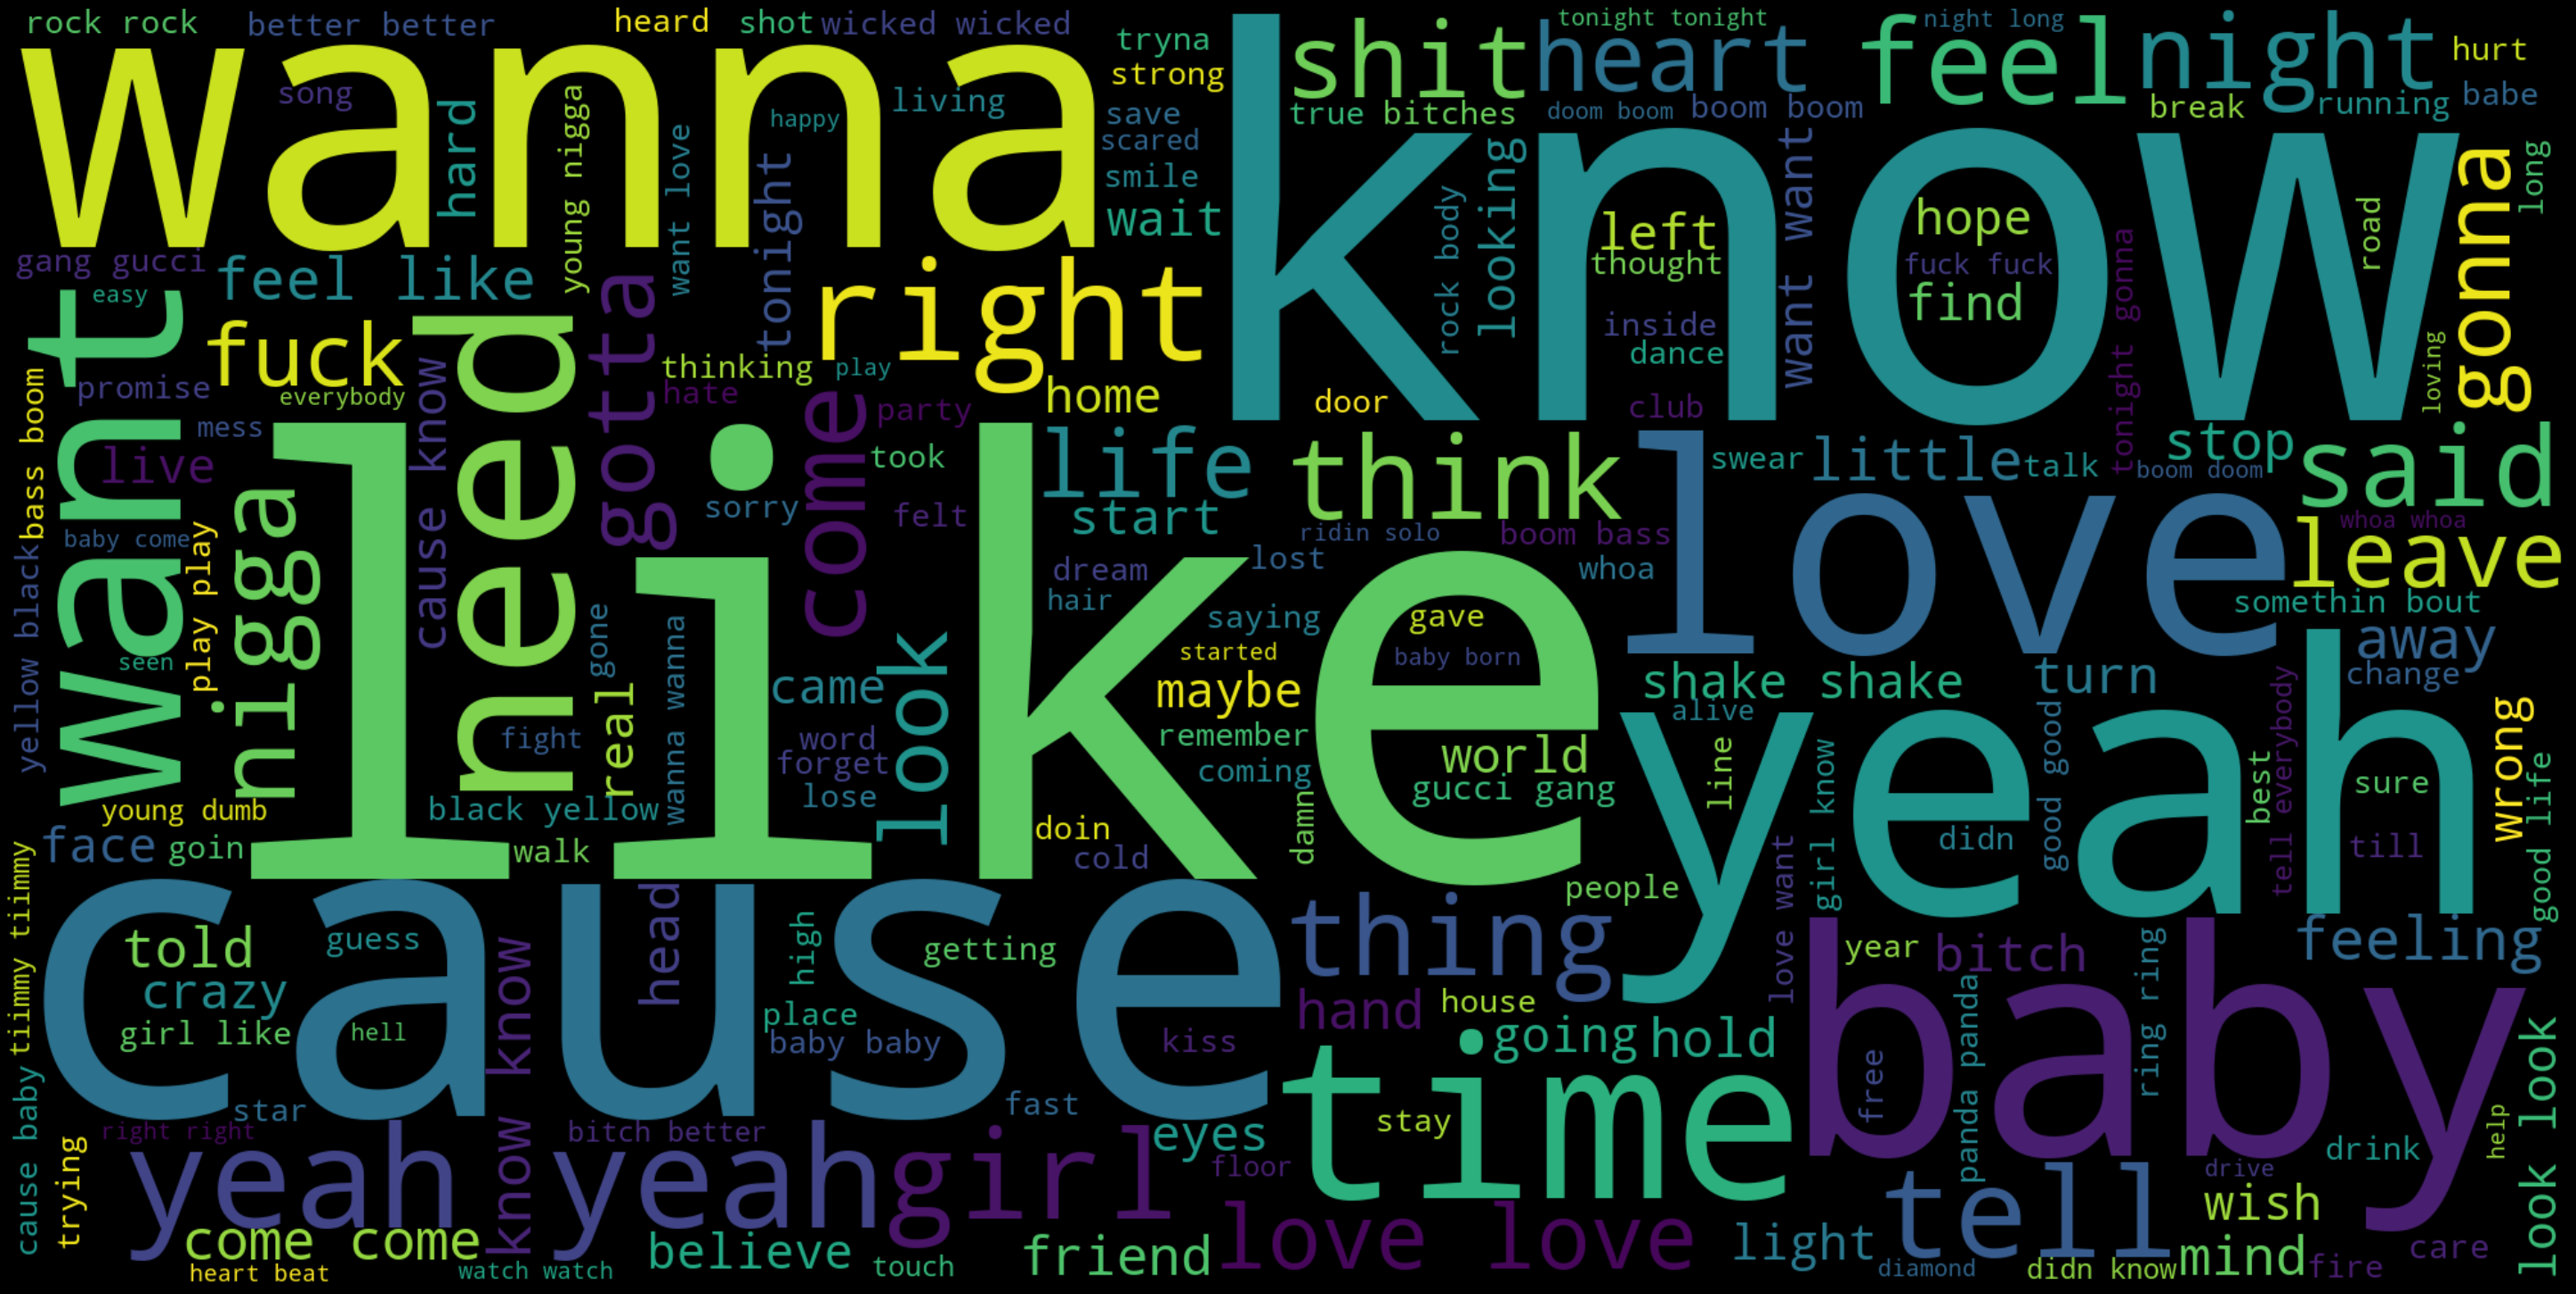

In [145]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(lyricd)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [146]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [147]:
count_vector = cv.fit_transform(dfall['Lyrics'])

In [148]:
count_vector.shape

(352, 5800)

In [149]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results.head()

,000,10,100,12,14th,15,16yrold,1738,1966,1986,1991,1995,1s,20,2005,2009,21,21st,23,24,30,3030,33,36,380,3am,3s,40,400,45,4th,50,502,5th,60,61,7500,80,800,808,...,yearning,years,yeezy,yellin,yelling,yellow,yep,yes,yesterday,yet,yiy,yo,yoda,yoncé,york,yota,you,youn,young,youngblood,younger,your,yours,yourself,youth,yuh,yung,yup,yves,zach,zagga,zana,zapper,zebra,zero,ziggy,zippers,zone,zoo,ça
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,48,0,0,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,52,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [150]:
cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95)

In [151]:
count_vector = cv.fit_transform(dfall['Lyrics'])

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [152]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results.head()

,10,30,act,actin,addicted,admit,advice,afraid,ago,ah,ahead,ain,air,alive,alright,amazing,american,angel,answer,answers,anybody,ap,apart,apl,apologize,arm,arms,ask,asked,asking,asleep,ass,attention,awake,away,ay,aye,babe,baby,bad,...,wire,wish,wit,woah,woke,woman,women,won,wonder,woo,word,words,work,worked,workin,working,world,worry,worse,worst,worth,wouldn,wraith,wrist,write,wrong,wrote,ya,yah,yea,yeah,year,years,yellow,yes,yesterday,yo,york,young,yup
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,...,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [153]:
from html import unescape
def my_tokenizer(doc):
            
    # apply the preprocessing and tokenzation steps
    doc_clean = unescape(doc).lower()
    tokens = nlp(doc_clean)
    lemmatized_tokens = [token.lemma_ for token in tokens if (len(str(token.lemma_))>2)]
            
    # use CountVectorizer's _word_ngrams built in method
    # to remove stop words and extract n-grams
    return(lemmatized_tokens)

In [155]:
 cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95, tokenizer=my_tokenizer)
 count_vector = cv.fit_transform(dfall['Lyrics'])
 results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
 results.head()


/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['-PRON-', 'regard', 'use'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


,...,act,actin,addict,admit,advice,afraid,ago,ahead,air,alive,alright,amazing,american,angel,animal,answer,anybody,apart,apologize,arm,ask,asleep,ass,attention,awake,away,aye,babe,baby,bad,bag,ball,ballin,band,bank,bar,barbie,barely,bass,...,whiskey,white,whoa,wide,wife,wild,win,wind,window,wine,wing,wire,wish,wit,woah,woman,wonder,woo,wood,word,work,workin,world,worry,worth,wraith,wreck,wrist,write,wrong,yah,yea,yeah,year,yellow,yes,yesterday,york,young,yup
0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,6,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,11,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [156]:
results.sum(axis =0).sort_values(ascending = False)

like        1153
know        1065
love         981
yeah         941
want         639
            ... 
prize          4
wide           4
heel           4
spark          4
distance       4
Length: 989, dtype: int64

In [157]:
sum_words =  results.sum(axis =0)
sum_words.sort_values(ascending = False).head()   

like    1153
know    1065
love     981
yeah     941
want     639
dtype: int64

In [159]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, #ngram_range=(1, 2), 
 #                    token_pattern = '(\\bκ[οω]ρ[οω]ν[α-ωά-ώ]+\\b') )\| (\\bκυβ[α-ωά-ώ]\\b) #, tokenizer=my_tokenizer)
                     token_pattern = '\\bcov[a-z0-9-_]*\\b') #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(dfall['Lyrics'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

,cover,covered,covers
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [162]:
from sklearn.metrics.pairwise import cosine_similarity
tfidf_vectorizer = TfidfVectorizer(stop_words= nlp.Defaults.stop_words, max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(dfall['Lyrics'])  #finds the tfidf score with normalization
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


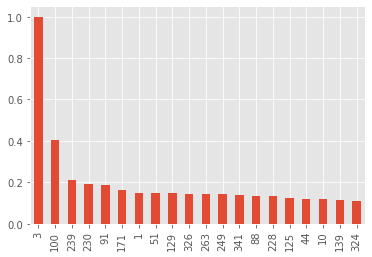

In [163]:
pd.DataFrame(arr).loc[3].sort_values(ascending = False).head(20).plot(kind = 'bar')

In [164]:
dfall['Lyrics'].loc[3]

TypeError: ignored